In [278]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error

sns.set_theme(style="darkgrid")

#######
# Funciones de utilidad
def pintaDigito(df_Xc, df_Xr, nan_mat, indice):
    imagenI= df_Xc.iloc[indice].values.reshape(28,28)
    imagenF= df_Xr[indice].reshape(28,28)
    mask=nan_mat[indice].reshape(28,28)

    imagenAciertos= np.dstack([imagenI, imagenI, imagenI])
    #Falsos
    imagenAciertos[((imagenI!=imagenF) & mask),:]=[255,0,0]
    #Verdaderos
    imagenAciertos[((imagenI==imagenF) & mask),:]=[0,255,0]
    fig, ax = plt.subplots(figsize=(5,4))
    plt.axis('off')

    plt.imshow(imagenAciertos)
    plt.show()


def pintaDigitoReco(df_Xr, indice,titulo):
    imagenF= df_Xr[indice].reshape(28,28)
    imagenReco= np.dstack([imagenF, imagenF, imagenF])
    
    fig, ax = plt.subplots(figsize=(5,4))
    plt.axis('off')
    plt.imshow(imagenReco,origin = 'upper', aspect = 1)
    
    
    plt.title(titulo)
    plt.savefig(titulo+".png")
    plt.show()

ruta="Cap5Bl1/"

# Cargamos digitos y errores del Baseline y representamos
Tanto original como reconstruidos.

In [204]:
#Cargamos resultados (!Ojo! Son antes de truncar y normalizados!!!!!!!!!!!!!!!!!!!!!!!!) 
resultados = pd.read_pickle(ruta+'resultados_MNIST_Baseline.pkl').xs('MNIST')
resultados

,mae,rmse,mse,accuracy
ceros,0.139330,0.343233,0.117809,0.787642
mean,0.120808,0.230611,0.053182,0.462678
knn,0.104341,0.210217,0.044191,0.521193
svd,0.088629,0.173832,0.030218,0.462678
mice,0.077838,0.158019,0.024970,0.462678
spectral,0.076927,0.157667,0.024859,0.336922


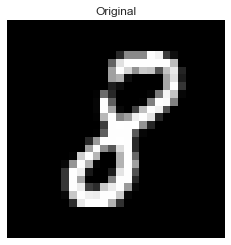

ceros


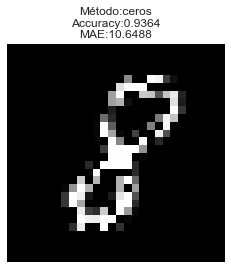

mean


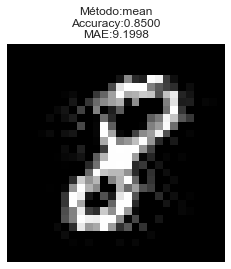

knn


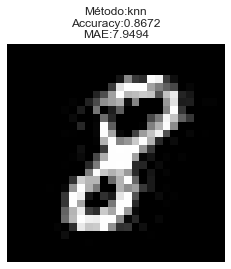

mice


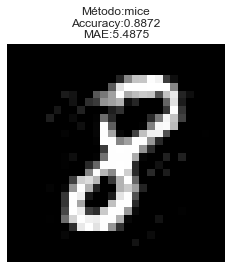

svd


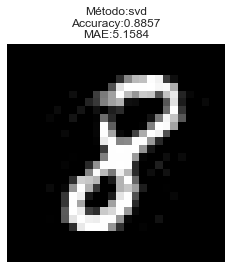

spectral


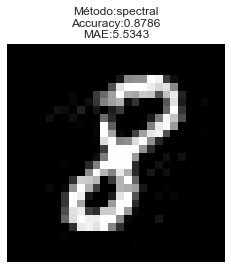

In [279]:
#Seleccionamos el dígito 'indice' a representar
indice=20

#Cargamos original y máscara
df_Xc=np.loadtxt(ruta+'resultados_Orig_Baseline.txt',  delimiter=',').astype(int)
nan_mat=np.loadtxt(ruta+'MNIST_nanMat.txt',  delimiter=',').astype(bool)


#Representamos Reconstruidos

#Baseline
met=['ceros','mean', 'knn', 'mice', 'svd', 'spectral']
pintaDigitoReco(df_Xc,indice,"Original")
for m in met:
    print(m)
    A=np.loadtxt(ruta+'resultados_'+m+'_Baseline.txt',  delimiter=',').astype(int)
    accuracy_real=accuracy_score(df_Xc.reshape(-1) , A.reshape(-1))
    mae_real=mean_absolute_error(df_Xc.reshape(-1), A.reshape(-1))
    pintaDigitoReco(A,indice,"Método:"+m
                    +"\nAccuracy:{:.4f}".format(accuracy_real)
                    +"\nMAE:{:.4f}".format(mae_real))



ceros


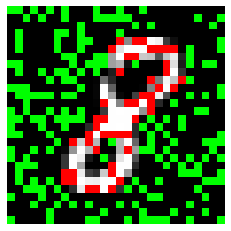

mean


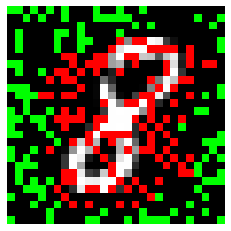

knn


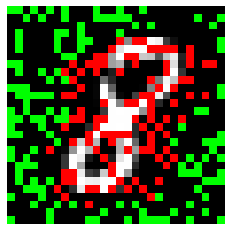

mice


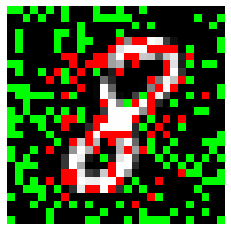

svd


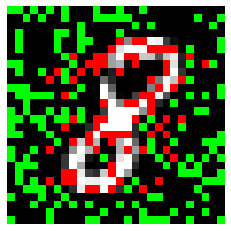

spectral


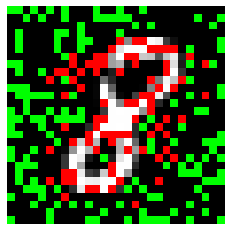

In [277]:
#Representamos errores
for m in met:
    print(m)
    A=np.loadtxt(ruta+'resultados_'+m+'_Baseline.txt',  delimiter=',').astype(int)
    pintaDigito(pd.DataFrame(df_Xc), A, nan_mat, indice)
    

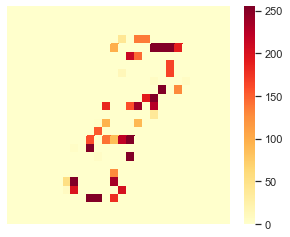

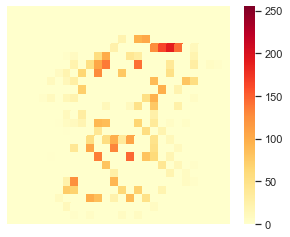

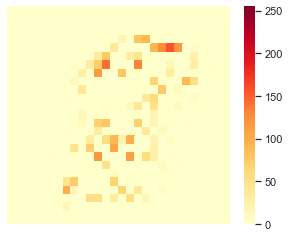

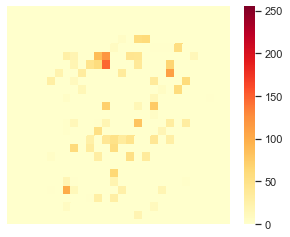

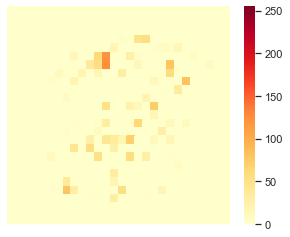

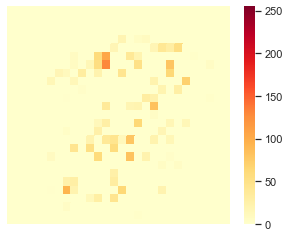

In [280]:
#Representamos Heatmap
for m in met:
    A=np.loadtxt(ruta+'resultados_'+m+'_Baseline.txt',  delimiter=',').astype(int)
    fig, ax = plt.subplots(figsize=(5,4))
    hs=sns.heatmap(abs(df_Xc[indice]-A[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
    #hs.set_title(m)
    plt.axis('off')
    plt.savefig("hs_"+m+".png")
    plt.show()

# Experimentos con GRAPE

In [200]:
#Grape con 20k epochs (!Ojo! Son antes de truncar y normalizados!!!!!!!!!!!!!!!!!!!!!!!!) 
#Cargamos resultados
resultados = pd.read_pickle(ruta+'resultados_MNIST_grapeBasicoClas.pkl').xs('MNIST')
resultados

,mae,rmse,mse,accuracy
0,0.097213,0.266215,0.070871,0.795983


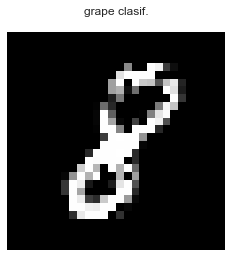

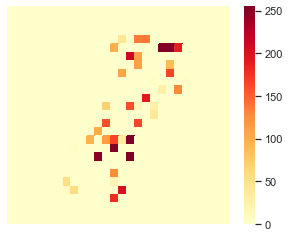

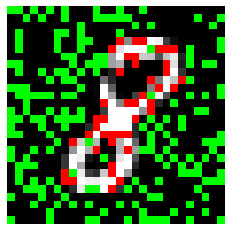

In [296]:

m='grape clasificacion'
df_Xg=np.loadtxt(ruta+"resultados_grapeBasicoClas.txt",  delimiter=',').astype(int)
accuracy_real=accuracy_score(df_Xc.reshape(-1) , df_Xg.reshape(-1))
mae_real=mean_absolute_error(df_Xc.reshape(-1), df_Xg.reshape(-1))
pintaDigitoReco(df_Xg,indice,"grape clasif.\n")#"Método: "+m
                    #+"\nAccuracy:{:.4f}".format(accuracy_real)
                    #+"\nMAE:{:.4f}".format(mae_real))
fig, ax = plt.subplots(figsize=(5,4))
hs=sns.heatmap(abs(df_Xc[indice]-df_Xg[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
#hs.set_title(m)
plt.axis('off')
plt.savefig("hs_"+"gra_clas"+".png")
plt.show()
pintaDigito(pd.DataFrame(df_Xc), df_Xg, nan_mat, indice)

In [140]:
#Grape con 20k epochs (!Ojo! Son antes de truncar y normalizados!!!!!!!!!!!!!!!!!!!!!!!!) 
#Cargamos resultados
resultados = pd.read_pickle(ruta+'resultados_MNIST_grapeBasicoClasPesos.pkl').xs('MNIST')
resultados

,mae,rmse,mse,accuracy
0,0.216845,0.346133,0.119808,0.446719


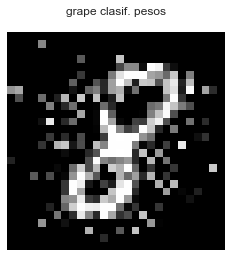

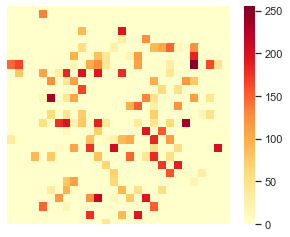

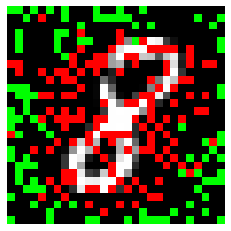

In [297]:
m="grape clasificación con pesos"
df_Xg=np.loadtxt(ruta+"resultados_grapeBasicoClasPesos.txt",  delimiter=',').astype(int)
accuracy_real=accuracy_score(df_Xc.reshape(-1) , df_Xg.reshape(-1))
mae_real=mean_absolute_error(df_Xc.reshape(-1), df_Xg.reshape(-1))
pintaDigitoReco(df_Xg,indice,"grape clasif. pesos\n")#"Método: "+m
                    #+"\nAccuracy:{:.4f}".format(accuracy_real)
                    #+"\nMAE:{:.4f}".format(mae_real))
fig, ax = plt.subplots(figsize=(5,4))
hs=sns.heatmap(abs(df_Xc[indice]-df_Xg[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
#hs.set_title(m)
plt.axis('off')
plt.savefig("hs_"+"gra_clas_pesos"+".png")
plt.show()
pintaDigito(pd.DataFrame(df_Xc), df_Xg, nan_mat, indice)

In [188]:
#Dos fases (!Ojo! Son antes de truncar y normalizados!!!!!!!!!!!!!!!!!!!!!!!!) 
# Epoch Fase 1=2000
# Epoch Fase 1=20000
#Cargamos resultados
resultados = pd.read_pickle(ruta+'resultados_MNIST_grapeFasesClas.pkl').xs('MNIST')
resultados

,fase,mae,rmse,mse,accuracy
0,1,0.106112,0.291148,0.084767,0.806579
1,2,0.079798,0.241848,0.058490,0.824028


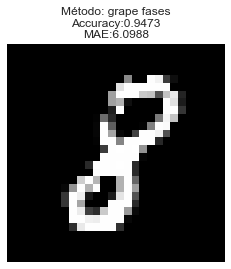

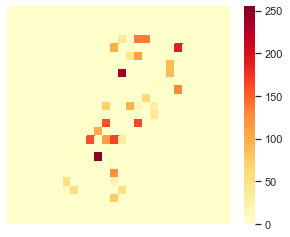

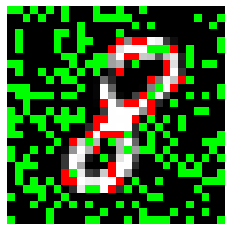

In [285]:

df_Xg=np.loadtxt(ruta+"resultados_grapeFasesClas.txt",  delimiter=',').astype(int)
accuracy_real=accuracy_score(df_Xc.reshape(-1) , df_Xg.reshape(-1))
mae_real=mean_absolute_error(df_Xc.reshape(-1), df_Xg.reshape(-1))
pintaDigitoReco(df_Xg,indice,"Método: grape fases"
                    +"\nAccuracy:{:.4f}".format(accuracy_real)
                    +"\nMAE:{:.4f}".format(mae_real))
fig, ax = plt.subplots(figsize=(5,4))
hs=sns.heatmap(abs(df_Xc[indice]-df_Xg[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
#hs.set_title('grape fases')
plt.axis('off')
plt.savefig("hs_"+"gra_fases"+".png")
plt.show()
pintaDigito(pd.DataFrame(df_Xc), df_Xg, nan_mat, indice)

In [193]:
# Como problema de regresion
# Epoch Fase 20.000
#Cargamos resultados sin redondear, ni truncar
resultados = pd.read_pickle(ruta+'resultados_MNIST_grapeBasicoReg.pkl').xs('MNIST')
resultados

,mae,rmse,mse,accuracy
0,0.124885,1.359103,1.847162,0.0


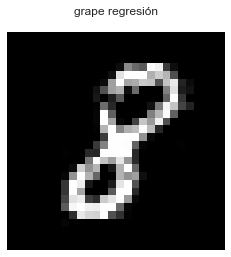

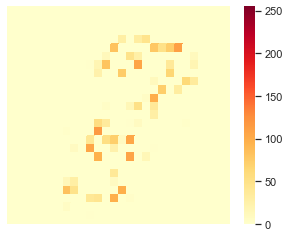

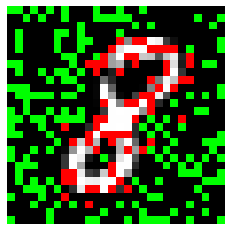

In [298]:
df_Xg=np.loadtxt(ruta+"resultados_grapeBasicoReg.txt",  delimiter=',').astype(int)
accuracy_real=accuracy_score(df_Xc.reshape(-1) , df_Xg.reshape(-1))
mae_real=mean_absolute_error(df_Xc.reshape(-1), df_Xg.reshape(-1))
pintaDigitoReco(df_Xg,indice,"grape regresión\n")#"Método: "+m
                    #+"\nAccuracy:{:.4f}".format(accuracy_real)
                    #+"\nMAE:{:.4f}".format(mae_real))
fig, ax = plt.subplots(figsize=(5,4))
hs=sns.heatmap(abs(df_Xc[indice]-df_Xg[indice]).reshape(28,28),cmap="YlOrRd",vmax=255,vmin=0,ax=ax)
#hs.set_title(m)
plt.axis('off')
plt.savefig("hs_"+"gra_reg"+".png")
plt.show()
pintaDigito(pd.DataFrame(df_Xc), df_Xg, nan_mat, indice)

# Intentamos reconstruir 3's a los que les hemos quitado pixeles aleatoriamente

0


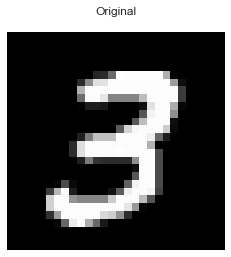

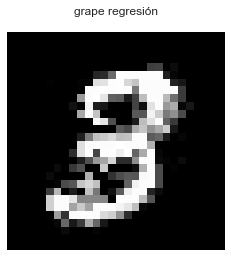

14


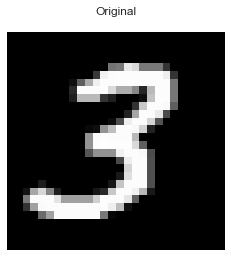

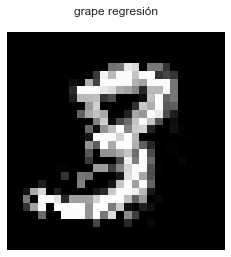

30


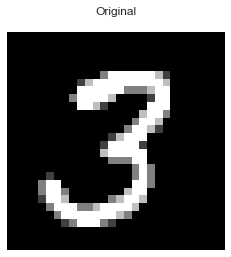

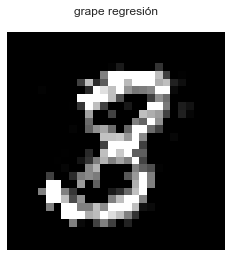

39


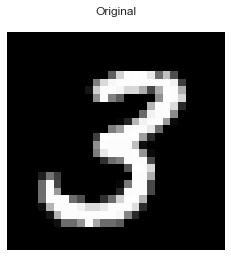

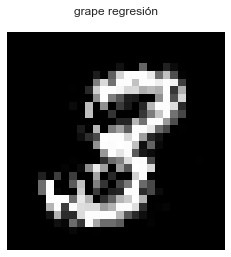

95


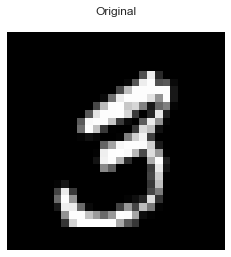

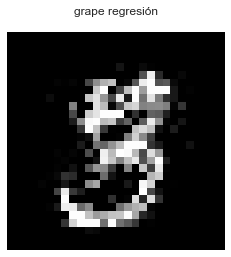

In [324]:
df_Xc=np.loadtxt(ruta+"resultados_prediccion3Orig.txt",  delimiter=',').astype(int)
df_Xg=np.loadtxt(ruta+"resultados_prediccion3.txt",  delimiter=',').astype(int)

# [0, 12, 13, 14, 16, 30, 39, 95]
for indice in [0, 14, 30, 39, 95]:
    print(indice)    
    pintaDigitoReco(df_Xc,indice,"Original\n")
    pintaDigitoReco(df_Xg,indice,"grape regresión\n")
